In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier  

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


Github link: https://github.com/colites/Titanic-supervised-final

For this dataset, the goal is to be able to predict who survived the sinking of the titanic through a ML model. We are given a training set that contains information about a subset of the passengers in tabular form, with one of the columns indicating survival. This column would serve as the labels, with the end goal being to predict survival for another set of passengers in the titanic that are included in the test set. The test set will not include the labels, so the ML model must be able to predict these labels somehow.

The success of the ML model will be determined by accuracy. The simplified formula for accuracy is: correct predictions / total predictions.

For this specific dataset, I will be using an supervised model to classify the data. To decide what kind of unsupervised model would work best with this problem, I will first do data cleaning to get the useful features and remove anything that will make the model misclassify. I will then do Exploratory Data Analysis to figure out what kind of supervised model would best fit the problem.

First, we must do data cleaning by removing duplicates and removing any null values that are present in the dataframes. Null values can negatively impact model performance, which is why they must be dropped. They also do not give any meaningful information.

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# these are the datatypes of the data
print(f'The data types for the table are: {train_data.dtypes}')
train_data.info()

The data types for the table are: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non

In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#find the number of duplicates in the training data
duplicates = train_data['PassengerId'].duplicated().sum()
print(duplicates)


0


In [8]:
# find the null values
missing_values_count = train_data.isnull().sum()
print(f' The number of missing values is :{missing_values_count}')

 The number of missing values is :PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
missing_values_count_test = test_data.isnull().sum()
print(f' The number of missing values is :{missing_values_count_test}')

 The number of missing values is :PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Seeing this data, we can see that Cabin has lots of missing values. Age also has many missing values. These values are NaNs, so they will interfere in the analysis. Since Cabin has large amounts of missing values, that table will be dropped. Cabin could have been a useful feature for predicting survival rates since Cabin corresponds to location on the ship, which could plausibly play atleast some role in survival rates. This column has too many missing values to be able to be used, since using only the remaining values could introduce bias due to the small sample size. 

Since age has less missing values, we will fill in the values of age with the median so that the dataset numbers are less affected and we can still use age as a feature without dropping a significant amount of rows.

Since so few values were missing in embarked, we will just drop those rows.

In [10]:
## Drop the Cabin column 
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

## Fill in the empty Age values with the median age
median_age = train_data['Age'].median()
train_data.fillna({'Age': median_age}, inplace=True)

median_age_test = test_data['Age'].median()
test_data.fillna({'Age': median_age_test}, inplace=True)

#drop the embarked rows that were empty, or anything else that is empty
train_data.dropna(inplace=True)

median_fare_test = test_data['Fare'].median()
test_data.fillna({'Fare': median_fare_test}, inplace=True)



In [11]:
missing_values_count = train_data.isnull().sum()
print(f' The number of missing values is :{missing_values_count}')
train_data.info()

 The number of missing values is :PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [12]:
missing_values_count_test = test_data.isnull().sum()
print(f' The number of missing values is :{missing_values_count_test}')
test_data.info()

 The number of missing values is :PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


As can be seen, We have gotten rid of the empty values and cleaned the dataset of invalid values.

Now we need to figure out which variables might be the most important to figure out for this problem. Given that this is about the titanic sinking and this happened during the early 1900's, we can surmise that Sex, Age, and Pclass(ticket class) could all be important variables for predicting Survival.

We also know that names and tickets are not going to be meaningful features, since they will not be useful in predicting survival. Names have titles, but those titles are encapsulated in age, sex, and pclass. This means we do not lose any useful information. Tickets do not have any meaningful discernible information. PassengerId are only unique identifiers, which wont be useful features for the model. We will keep PassengerId for submissions for test predictions, however.

In [13]:
#drop any columns that are not meaningful
train_data.drop(['Name','Ticket'], axis=1, inplace=True)
test_data.drop(['Name','Ticket'], axis=1, inplace=True)

train_original = train_data
test_original = test_data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


Since most models require numerical input to be able to fit data, we must encode the columns that have String (Object default in pandas) to a numerical value. Since there is no ordinal relationships between the columns to be encoded, we can do one-hot encoding. One hot encoding is better because Sex and Embarked are both nominal categories without any hierarchy. A hierarchy would be a relationship which would be important for fitting, which would be a situation where label encoding would be better. In this case, one-hot encoding will create extra binary categories that could capture the data better than normal encoding. 

I am also going to have another set of train and testing data that will have normal label encoding to measure the effects that this feature engineering had on the accuracy of the models.

In [14]:
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'])

train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_female   889 non-null    bool   
 8   Sex_male     889 non-null    bool   
 9   Embarked_C   889 non-null    bool   
 10  Embarked_Q   889 non-null    bool   
 11  Embarked_S   889 non-null    bool   
dtypes: bool(5), float64(2), int64(5)
memory usage: 59.9 KB


In [15]:
# Initialize the label encoder
label_encoder = LabelEncoder()

#encode all the non-numerical columns
encoded_series = label_encoder.fit_transform(train_original['Sex'])
train_original['Sex'] = encoded_series

encoded_series = label_encoder.fit_transform(train_original['Embarked'])
train_original['Embarked'] = encoded_series

encoded_series = label_encoder.fit_transform(test_original['Sex'])
test_original['Sex'] = encoded_series

encoded_series = label_encoder.fit_transform(test_original['Embarked'])
test_original['Embarked'] = encoded_series

With the dataset now cleaned of invalid values and unhelpful information, we can now begin to figure out the relationships between the remaining features and their relation to the survival of the individuals.

Survived
0    549
1    340
Name: count, dtype: int64


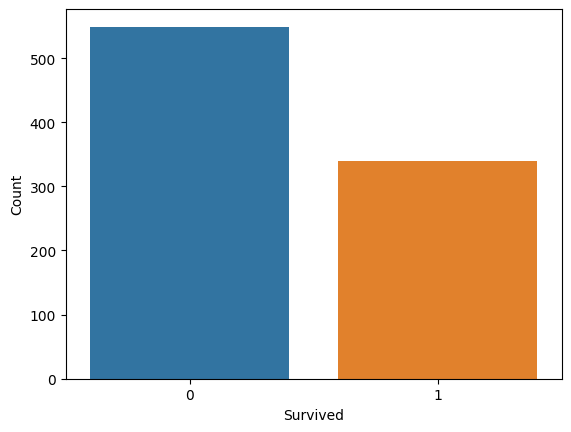

In [16]:
## Check to see how many people survived
## 0 is did not survive, 1 is survived
print(train_data['Survived'].value_counts())
survival_counts = train_data['Survived'].value_counts().reset_index()
survival_counts.columns = ['Survived', 'Count']

ax = sns.barplot(x='Survived', y='Count', data=survival_counts)

Number of Women in the training set:  312
Number of Men in the training set:  577


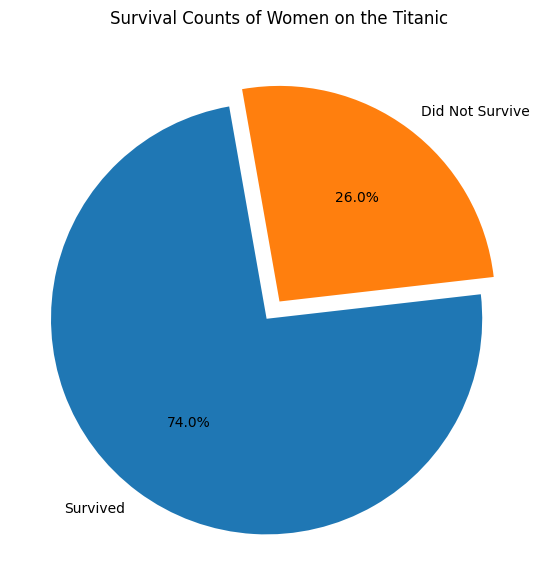

In [17]:
women_survived = train_data[(train_data['Sex_female'] == 1) & (train_data['Survived'] == 1)].shape[0]
women_notsurvived = train_data[(train_data['Sex_female'] == 1) & (train_data['Survived'] == 0)].shape[0]
print("Number of Women in the training set: ", (train_data['Sex_female'] == 1).sum())
print("Number of Men in the training set: ", (train_data['Sex_male'] == 1).sum())

plt.figure(figsize=(7, 7))
plt.pie([women_survived, women_notsurvived], explode=(0.1,0), labels=['Survived', 'Did Not Survive'], autopct='%1.1f%%', startangle=100)
plt.title('Survival Counts of Women on the Titanic')
plt.show()

In [18]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005028,-0.035330,0.031319,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269
Survived,-0.005028,1.000000,-0.335549,-0.069822,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.035330,-0.335549,1.000000,-0.336512,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,0.031319,-0.069822,-0.336512,1.000000,-0.232543,-0.171485,0.093707,-0.086506,0.086506,0.032098,-0.030436,-0.008964
SibSp,-0.057686,-0.034040,0.081656,-0.232543,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,-0.001657,0.083151,0.016824,-0.171485,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.012703,0.255290,-0.548193,0.093707,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
Sex_female,-0.043136,0.541585,-0.127741,-0.086506,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,0.043136,-0.541585,0.127741,0.086506,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,-0.001208,0.169966,-0.245733,0.032098,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613


As we can see in the correlation matrix above, Sex plays a large role. Specifically, being a woman was correlated with higher survival rates than being a man. Being a man was negatively correlated with survival, so being a man meant they statistically had a larger chance of dying. This makes sense due to the cultural norms during that era. All the other categories had only slight correlations. 
I will next split Pclass with one-hot encoding because I believe there is a correlation between survival and higher socio-economic status.

In [19]:
## do one hot encoding on Pclass, splitting it
train_data = pd.get_dummies(train_data, columns=['Pclass'], prefix='Class')
test_data = pd.get_dummies(test_data, columns=['Pclass'], prefix='Class')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    int64  
 4   Parch        889 non-null    int64  
 5   Fare         889 non-null    float64
 6   Sex_female   889 non-null    bool   
 7   Sex_male     889 non-null    bool   
 8   Embarked_C   889 non-null    bool   
 9   Embarked_Q   889 non-null    bool   
 10  Embarked_S   889 non-null    bool   
 11  Class_1      889 non-null    bool   
 12  Class_2      889 non-null    bool   
 13  Class_3      889 non-null    bool   
dtypes: bool(8), float64(2), int64(4)
memory usage: 55.6 KB


In [20]:
train_data.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Class_1,Class_2,Class_3
PassengerId,1.000000,-0.005028,0.031319,-0.057686,-0.001657,0.012703,-0.043136,0.043136,-0.001208,-0.033694,0.022269,0.034511,-0.000086,-0.029601
Survived,-0.005028,1.000000,-0.069822,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777,0.282368,0.095002,-0.320171
Age,0.031319,-0.069822,1.000000,-0.232543,-0.171485,0.093707,-0.086506,0.086506,0.032098,-0.030436,-0.008964,0.319924,0.017724,-0.289498
SibSp,-0.057686,-0.034040,-0.232543,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438,-0.052894,-0.056507,0.091515
Parch,-0.001657,0.083151,-0.171485,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512,-0.015809,-0.001278,0.014634
Fare,0.012703,0.255290,0.093707,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758,0.590576,-0.117609,-0.411932
Sex_female,-0.043136,0.541585,-0.086506,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405,0.093142,0.066459,-0.134227
Sex_male,0.043136,-0.541585,0.086506,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405,-0.093142,-0.066459,0.134227
Embarked_C,-0.001208,0.169966,0.032098,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613,0.299472,-0.126039,-0.154785
Embarked_Q,-0.033694,0.004536,-0.030436,-0.026692,-0.081585,-0.116684,0.075217,-0.075217,-0.148646,1.000000,-0.499261,-0.154680,-0.127705,0.237035


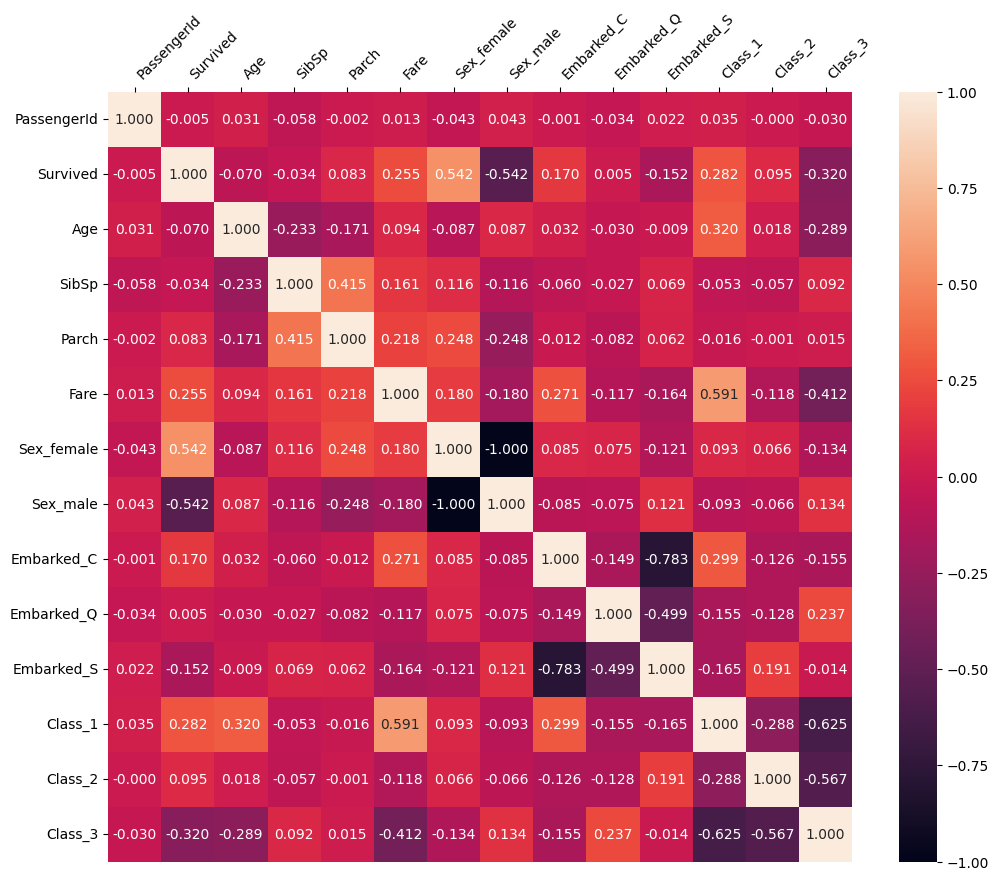

In [21]:
# visualizing correlation matrix using a heatmap
plt.figure(figsize=(12, 10)) 

ax = sns.heatmap(train_data.corr(), annot=True, fmt=".3f")  

ax.xaxis.tick_top()

plt.xticks(rotation=45, ha='left')   
plt.yticks(rotation=0)  

plt.show()

As can be seen in the heatmap and correlation matrix above, the categories with the most correlation where being a woman, being first class, and the fare. The fare, being first class, and embarking at C all had slight correlations to each other as well. These features are all probably signals of wealth, with the embarkment probably being a spot with wealthier people and the fare also being a more expensive fare for wealthier people.

With this, I have analyzed the data and can now train a model. I am going to use an SVM model to analyze these features. 

I am going to use the SVM model because SVM's can model non-linear boundaries using kernels like the rbf kernel. Also important is that SVM tends to generalize very well to unseen data, so it is less prone to overfitting than other supervised algorithms. This is due to the SVM's focus on maximizing margin between classes. SVM also has other advantages that may not be fully taken advantage in this dataset, such as its effectiveness in high dimensions.

We will train a basic SVM and then do parameter tuning on the most impactful parameters, which are C and gamma. To do the parameter tuning, we will use gridsearch to test out reasonable C and gamma parameters and see their performance. Whichever performs the best will be the model used. As a general strategy for hyperparameter tuning, whenever there is overfitting, the complexity must be decreased or regularization added. This is basically the role of C in the SVM. If a model is underfitting, then the hyperparameters must be tuned so that it begins to learn more knowledge. This usually means increasing the complexity of the model somehow. I also used gridsearch with a range of values that could potentially maximize the metrics and this can be used for most supervised techniques.

First I am going to see how the linear SVC does for comparison with the rbf kernel SVM, which is non-linear. 

In [22]:
## Function to create a submission csv
def submit_csv(name, test_pred):
    submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],
        "Survived": test_pred
        })
    submission.to_csv(name, index=False)

In [23]:
train_features = train_data.drop(['Survived'], axis=1)
train_labels = train_data['Survived']

train_original = train_original.drop(['Survived'], axis=1)

In [24]:
# For a linear kernel:
svm_classifier = SVC(kernel='linear', C=1.0)  

svm_classifier.fit(train_features, train_labels)

SVC(kernel='linear')

In [25]:
y_pred = svm_classifier.predict(train_features)

accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.796400449943757


As can be seen above, the linear kernel SVM has almost 80% accuracy on the train set. This means that the data is linearly separable to a good degree since there was a low C value, allowing for less mislabellings to take place than higher C values. We will now Tune the C parameter for the linear kernel to see if there can be improvements to the accuracy. Since C is low, a higher C has a high probability of increasing the training accuracy further. This model still hasnt been tested on the test set, so there is a chance of overfitting. Since we are using an SVM model, the chance of overfitting is lower compared to other ML models. 

In [26]:
param_grid = {'C': [0.1, 1, 5, 10], 'kernel':['linear']}

# Grid search
grid_linear = GridSearchCV(SVC(), param_grid)
grid_linear.fit(train_features, train_labels)

# Best parameters and best score
print(f"Best parameters: {grid_linear.best_params_}")
print(f"Best score: {grid_linear.best_score_:.2f}")

Best parameters: {'C': 5, 'kernel': 'linear'}
Best score: 0.79


In [27]:
y_pred = grid_linear.predict(train_features)

accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8031496062992126


In [28]:
y_pred = grid_linear.predict(test_data)

submit_csv("grid_linear_best.csv", y_pred)

Now, we will test the rbf kernel instead of the linear kernel. The rbf kernel is non-linear, which means it can attempt to separate more complex features than a linear kernel.

In [29]:
# For a non-linear RBF Kernel:
svm_classifier = SVC(kernel='rbf', gamma='scale', C=1.0)

svm_classifier.fit(train_features, train_labels)

SVC()

In [30]:
y_pred = svm_classifier.predict(train_features)

accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6625421822272216


As can be seen above, it seems that the rbf kernel does worse than the linear kernel SVM. This might be due to the data being linearly separable and the linear kernel being a better match than a non-linear kernel, which might be prone to noise more on a smaller and more linear dataset. Non-linear kernels usually perform better on bigger datasets and the titanic dataset is very small, with only a few hundred rows in the training set. These factors likely contributed to the poorer performance of the rbf kernel.

In [31]:
param_grid = {'C': [1, 10, 50, 100, 200], 'gamma': [0, 0.000001,0.00001,0.0001,0.001], 'kernel':['rbf']}

# Grid search
grid = GridSearchCV(SVC(), param_grid)
grid.fit(train_features, train_labels)

# Best parameters and best score
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.2f}")

Best parameters: {'C': 200, 'gamma': 1e-05, 'kernel': 'rbf'}
Best score: 0.70


In [32]:
y_pred = grid.predict(train_features)

accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7221597300337458


In [33]:
y_pred = grid.predict(test_data)

submit_csv("grid_rbf_best.csv", y_pred)

As can be seen by the test results, there is a bit of overfitting in both models. The models also do not perform very well for a binary classification task, since the best one, the linear kernel, is only getting a 74% accuracy score during testing with the test set. The rbf kernel gets a lower 66% accuracy, which is only 16% above random guessing. 

Since the rbf kernel is more sensitive to noise in the data, especially in a very small dataset like the titanic dataset, it can be beneficial to try and see if the hot-encoding negatively affected the accuracy of the models. The splitting of some of the columns could have created noise that the rbf kernel and linear kernel were both more sensitive to, leading to worse results.

In [34]:
# For a linear kernel:
svm_classifier_o = SVC(kernel='linear', C=1.0)  

svm_classifier_o.fit(train_original, train_labels)

SVC(kernel='linear')

In [35]:
y_pred = svm_classifier_o.predict(train_original)

accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7975253093363329


In [36]:
param_grid = {'C': [0.1, 1, 5, 10], 'kernel':['linear']}

# Grid search
grid_linear_o = GridSearchCV(SVC(), param_grid)
grid_linear_o.fit(train_original, train_labels)

# Best parameters and best score
print(f"Best parameters: {grid_linear_o.best_params_}")
print(f"Best score: {grid_linear_o.best_score_:.2f}")

y_pred = grid_linear_o.predict(train_original)
accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy}")

Best parameters: {'C': 5, 'kernel': 'linear'}
Best score: 0.80
Accuracy: 0.8008998875140607


In [37]:
y_pred = grid_linear_o.predict(test_original)

submit_csv("grid_linear_best_original.csv", y_pred)

As can be seen, the linear SVM performs around the same with the feature changes.

In [38]:
param_grid = {'C': [1, 10, 50, 100, 200], 'gamma': [0, 0.000001,0.00001,0.0001,0.001], 'kernel':['rbf']}

# Grid search
grid = GridSearchCV(SVC(), param_grid)
grid.fit(train_original, train_labels)

# Best parameters and best score
print(f"Best parameters: {grid.best_params_}")
print(f"Best score: {grid.best_score_:.2f}")

Best parameters: {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
Best score: 0.69


In [39]:
y_pred = grid.predict(train_original)

accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7052868391451068


In [40]:
y_pred = grid.predict(test_original)

submit_csv("grid_rbf_best_o.csv", y_pred)

We have only tested Support Vector Machines for this problem, but there are many other supervised techniques that can be used. One, for example, is K nearest neighbors. This algorithm was not picked as the main algorithm because it is sensitive to irrelevant features, since it treats all features as equals because it works based on picking the k nearest neighbors. The algorithm does not learn the importance of the features, it just calculates distances that are closest to it. Still, k nearest neighbors is versatile since it works in both classification and regression problems well and it can handle many different classes due to just using a distance metric to calculate labels.

Below, we will test out K neighbors with 5, just to see how a different supervised model would compare to the different SVM kernels seen earlier in this project.

In [44]:
# Create Knn instance
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(train_original, train_labels)

KNeighborsClassifier()

In [46]:
y_pred = knn.predict(train_original)
accuracy = accuracy_score(train_labels, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7536557930258717


In [47]:
y_pred = knn.predict(test_original)

submit_csv("knn.csv", y_pred)

| Model | train accuracy | test accuracy |
|----------|----------|----------|
| Linear SVM   | 0.803  | 0.744 |
| rbf SVM    | 0.72     | 0.665 |
| Linear SVM with normal Label encodings|    0.808  | 0.763  |
| rbf SVM with normal Label encodings | 0.705 | 0.657 |
| Knn n=5 | 0.75 |0.66

As can be seen in the chart above, the Linear SVM with normal encodings performed 10% better against both the rbf kernel models. It was the best performing model. The Knn model did not do well but it still performed at the level of the rbf kernel SVM in test accuracy. Since it uses distance metrics to decide classes, knn does not classify linearly. Both rbf and Knn, the non-linear classifiers, performed the worst in this project. This means that the data, atleast how it was used as input to the classifiers, was fairly linearly separable.

All of the models had a slight amount of overfitting, since most of the models did 5% better in the train set than the test set, with the best model also having the least amount of overfitting from all the models that were tested.
This might be due to having less specific information, due to not being hot-encoded, and because it was more simple. The simplicity of only separating linearly likely led to less noise and overfitting, since the data was probably reasonably linearly separable. This coupled with the small dataset led to a situation where the rbf kernel could not perform as optimally as the linear SVM.

During this project, I learned the importance of having effective feature visualizations. Lots of the relationships between the data would not have been obvious without looking at the correlation matrix and heatmap. Next time, it might be beneficial for me to figure out and potentially cluster the correlation relationships between features. This might bring new insights into the possible relationships between each feature, which could eventually help bring valuable insights into what kind of model would work best to classify or segment the data. Another thing I should do next time is to potentially run the models on subsets of features to see how the predictive power would compare to each other.

